In [68]:
import pandas as pd;
from sklearn.feature_extraction.text import TfidfTransformer
import numpy as np;
from sklearn.linear_model import Ridge
from sklearn import linear_model
import seaborn as sns


In [69]:
ratings_base = pd.read_csv('../../data/datasets/rating/kfold/u5.base.csv', sep=',', encoding='latin-1').drop_duplicates(subset=['user index', 'movie index'], keep='first')
ratings_test = pd.read_csv('../../data/datasets/rating/kfold/u5.test.csv', sep=',', encoding='latin-1').drop_duplicates(subset=['user index', 'movie index'], keep='first')

In [70]:
ratings_base.columns= ['movie id','user id', 'rating', 'comment', 'date', 'movie index', 'user index']
ratings_base

,movie id,user id,rating,comment,date,movie index,user index
0,tt0102813,ur0391152,2,I've always had kind of a perverse curiosity a...,22 August 2010,6914,81
1,tt0113824,ur0391152,5,"A very moving animÃ© film from Studio Ghibli, ...",29 September 2003,3181,81
2,tt0838283,ur0391152,4,A movie with a paper-thin premise Â two grown...,27 July 2008,5594,81
3,tt0058430,ur0391152,5,"I'm not going to go into any long, complicated...",17 May 2002,4601,81
4,tt0120913,ur0391152,4,Titan A.E. has probably the most amazing looki...,24 June 2000,5992,81
...,...,...,...,...,...,...,...
74592,tt1349938,ur4374846,5,I am in love with a new TV show. I don't know ...,30 January 2009,6147,1326
74593,tt2365946,ur4374846,1,Bitten: Mid-season review: Who am I supposed t...,18 February 2014,6277,1326
74594,tt2296682,ur4374846,1,Where do I begin? When I first started watchin...,11 November 2013,6876,1326
74595,tt1595680,ur4374846,4,I just watched the American Being Human and I ...,17 January 2011,7319,1326


In [71]:
movies = pd.read_csv('../../data/datasets/movie/ml_detail.csv', sep=',', encoding='latin-1')

In [72]:
movies = movies.drop(columns=['movie index'])

In [73]:
no_movies = movies.shape[0]
print('No movie themes: ', no_movies)
print(movies.shape)
X_train = movies[["Reality-TV","News","War", "Musical","Sci-Fi","Film-Noir","Thriller","Action","Biography","Family","Game-Show","Music","Short","Adventure","Animation","History","Drama","Horror","Documentary","Mystery","Western","Fantasy","Comedy","Sport","Talk-Show","Crime","Romance"]].values[:,:]
transformer = TfidfTransformer(smooth_idf=True, norm='l2')
tfidf = transformer.fit_transform(X_train).toarray()

print("tfidf: ", tfidf.shape)


No movie themes:  8352
(8352, 43)
tfidf:  (8352, 27)


In [74]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [75]:
ratings_base = pd.merge(ratings_base, movies, how='inner', on='movie id')
ratings_test = pd.merge(ratings_test, movies, how='inner', on='movie id')

In [76]:
# print(type(ratings_base))
ratings_train_arr = ratings_base.values[1:, :]
# print(type(ratings_train_arr))
ratings_test_arr = ratings_test.values[1:, :]


print('ratings_train_shape: ', ratings_train_arr.shape)
print('ratings_test_shape: ', ratings_test_arr.shape)


ratings_train_shape:  (74112, 49)
ratings_test_shape:  (18620, 49)


In [84]:
ratings_base[ratings_base['user index'] == 0]

,movie id,user id,rating,comment,date,movie index,user index,title,series,release year,...,Biography,Game-Show,Mystery,History,Music,Short,Sport,Sci-Fi,Crime,image_url
103,tt0094625,ur2707735,3,"""Akira"" made IMDb's Top 250 list way back in 1...",7 June 2018,2657,0,Akira,NaN,1988,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,https://m.media-amazon.com/images/M/MV5BNTQ0Mz...
247,tt0088794,ur2707735,4,Well it never gets that ominous for John Cusac...,20 July 2018,663,0,Better Off Dead...,NaN,1985,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,https://m.media-amazon.com/images/M/MV5BMTI5MT...
277,tt0107943,ur2707735,4,How difficult it must be to live inside the sk...,7 May 2018,4260,0,The Remains of the Day,NaN,1993,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,https://m.media-amazon.com/images/M/MV5BNzE0Zj...
391,tt0097216,ur2707735,4,This was my first Spike Lee film and I didn't ...,18 August 2011,3970,0,Do the Right Thing,NaN,1989,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,https://m.media-amazon.com/images/M/MV5BZmEwZG...
458,tt0990407,ur2707735,4,"I knew I'd give this a try at some point, but ...",4 February 2013,3369,0,The Green Hornet,NaN,2011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,https://m.media-amazon.com/images/M/MV5BMjE1OT...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38993,tt1446714,ur2707735,4,For a movie that didn't make a whole lot of se...,16 February 2017,6052,0,Prometheus,NaN,2012,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN
39001,tt8143990,ur2707735,2,"What a pointless movie. I don't mind quirky, i...",16 April 2021,2271,0,Kajillionaire,NaN,2020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN
39014,tt4276618,ur2707735,4,It's unfortunate that this British TV series i...,2 March 2020,123,0,C.B. Strike,TV Series,2017â,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN
39031,tt7979142,ur2707735,4,"I've seen Tye Sheridan in 2012's ""Mud"" and ""Th...",22 June 2020,611,0,The Night Clerk,NaN,2020,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN


In [85]:
def get_movies_rated_by_user(utility_matrix, user_index):
    user_index_list = utility_matrix[:, 6]
    row_ids = np.where(user_index_list == user_index)[0]
    movie_index_util_list = utility_matrix[row_ids, 5]
    rating_list = utility_matrix[row_ids, 2]
    return (movie_index_util_list, rating_list)

In [86]:
no_movie_theme = tfidf.shape[1]
n_users = 1390
w = np.zeros((no_movie_theme, n_users))
b = np.zeros((1, n_users))

In [87]:
user_index_list = ratings_base['user index'].value_counts().index.tolist()

In [88]:
print(tfidf.shape)

(8352, 27)


In [89]:
class Metrics():
    def computeMSE(y_true, y_pred):
        return np.mean((y_true-y_pred)**2)

    def computeMAE(y_true, y_pred):
        return np.mean(np.abs(y_true-y_pred))

    def computeSIA(y_true, y_pred, eps=1): 
        error = np.abs(y_true - y_pred)
        bina = [1 if err <= eps else 0 for err in error]
        res = np.mean(bina)
        return res

In [104]:
for i in user_index_list:
    movie_index_util_list, rating_list = get_movies_rated_by_user(ratings_train_arr, i)
    reg = linear_model.LinearRegression()
    tfdif_by_user = tfidf[movie_index_util_list.tolist()]
    
    reg.fit(tfdif_by_user, rating_list)

    w[:, i] = reg.coef_
    b[0, i] = reg.intercept_

In [105]:
import matplotlib.pyplot as plt
Y = tfidf.dot(w)  + b;
Y

array([[4.07364126, 3.67686448, 4.26010738, ..., 2.97638345, 1.60874965,
        4.63701909],
       [4.0451778 , 4.55713829, 4.6736487 , ..., 3.12871245, 1.7089489 ,
        4.33096084],
       [4.03297869, 3.59137731, 4.23832954, ..., 1.        , 1.49064286,
        3.01320446],
       ...,
       [3.98769974, 3.56612909, 4.28319047, ..., 3.68603661, 3.09543453,
        5.31990805],
       [3.97727622, 3.49346303, 4.36746004, ..., 3.11292721, 1.58650003,
        4.0542866 ],
       [4.02600318, 3.74211808, 4.30539797, ..., 2.9131067 , 1.56053168,
        5.        ]])

In [106]:
movie_indexes = ratings_train_arr[:, 5]
user_indexes = ratings_train_arr[:, 6]
true_scores = ratings_train_arr[:, 2]

y_true_train = []
y_predict_train = []
import math
for i in range(len(movie_indexes)):
    movie_index = movie_indexes[i]
    user_index = user_indexes[i]
    true_score = true_scores[i]
    if (Y[movie_index][user_index] != 0):
        y_true_train.append(true_score)
        y_predict_train.append(Y[movie_index][user_index])
y_predict_train = [5 if y > 5 else y for y in y_predict_train]
y_predict_train = [1 if y < 0 else y for y in y_predict_train]
y_predict_train = np.array(y_predict_train)
y_true_train = np.array(y_true_train)


In [107]:
#Compute MAE metrics
mae_train = Metrics.computeMAE(y_true_train, y_predict_train)
print(mae_train)
#Compute MSE metrics
mse_train = Metrics.computeMSE(y_true_train, y_predict_train)
print(mse_train)
#Compute SIA metrics
sia_train_1 = Metrics.computeSIA(y_true_train, y_predict_train, 1)
print(sia_train_1)

sia_train_0_5 = Metrics.computeSIA(y_true_train, y_predict_train, 0.5)
print(sia_train_0_5)

sia_train_0_25 = Metrics.computeSIA(y_true_train, y_predict_train, 0.25)
print(sia_train_0_25)


0.6059793250241824
0.7092761007505684
0.783584304835924
0.528807750431779
0.3483916234887737


In [108]:
movie_indexes = ratings_test_arr[:, 5]
user_indexes = ratings_test_arr[:, 6]
true_scores = ratings_test_arr[:, 2]

y_true_test = []
y_predict_test = []
import math
for i in range(len(movie_indexes)):
    movie_index = movie_indexes[i]
    user_index = user_indexes[i]
    true_score = true_scores[i]
    if (Y[movie_index][user_index] != 0):
        y_true_test.append(true_score)
        y_predict_test.append(Y[movie_index][user_index])
y_predict_test = [5 if y > 5 else y for y in y_predict_test]
y_predict_test = [1 if y < 0 else y for y in y_predict_test]
y_predict_test = np.array(y_predict_test)
y_true_test = np.array(y_true_test)


In [109]:
#Compute MAE metrics
mae_test = Metrics.computeMAE(y_true_test, y_predict_test)
print(mae_test)
#Compute MSE metrics
mse_test = Metrics.computeMSE(y_true_test, y_predict_test)
print(mse_test)
#Compute SIA metrics
sia_test_1 = Metrics.computeSIA(y_true_test, y_predict_test, 1)
print(sia_test_1)

sia_test_0_5 = Metrics.computeSIA(y_true_test, y_predict_test, 0.5)
print(sia_test_0_5)

sia_test_0_25 = Metrics.computeSIA(y_true_test, y_predict_test, 0.25)
print(sia_test_0_25)


0.8708086888198894
1.3817023553374819
0.6728786251342642
0.40150375939849625
0.230343716433942


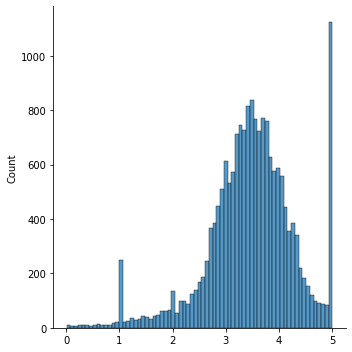

In [110]:
sns.displot(y_predict_test,)

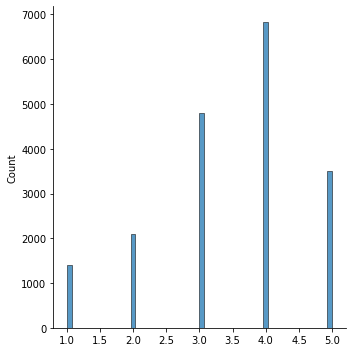

In [111]:
sns.displot(y_true_test)

In [112]:
for i in user_index_list:
    movie_index_util_list, rating_list = get_movies_rated_by_user(ratings_train_arr, i)
    ridge = Ridge(alpha=500, fit_intercept=True, max_iter=20000, normalize=True)
    tfdif_by_user = tfidf[movie_index_util_list.tolist()]
    
    ridge.fit(tfdif_by_user, rating_list)

    w[:, i] = ridge.coef_
    b[0, i] = ridge.intercept_

C:\Users\Pc\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
C:\Users\Pc\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the 

In [113]:
import matplotlib.pyplot as plt
Y = tfidf.dot(w)  + b;
Y

array([[4.03026854, 3.64292262, 4.29930787, ..., 3.24874143, 1.66966765,
        4.25191069],
       [4.03008973, 3.64446015, 4.3001214 , ..., 3.24964719, 1.67033116,
        4.25058511],
       [4.03018499, 3.64259309, 4.29937151, ..., 3.24154636, 1.66872911,
        4.24602317],
       ...,
       [4.03005555, 3.64270481, 4.29941466, ..., 3.2527198 , 1.67274225,
        4.25343397],
       [4.02999602, 3.64218026, 4.29944065, ..., 3.2500566 , 1.66949084,
        4.24968765],
       [4.03017471, 3.64289321, 4.29936761, ..., 3.24824433, 1.66928448,
        4.25405055]])

In [114]:
movie_indexes = ratings_train_arr[:, 5]
user_indexes = ratings_train_arr[:, 6]
true_scores = ratings_train_arr[:, 2]

y_true_train = []
y_predict_train = []
import math
for i in range(len(movie_indexes)):
    movie_index = movie_indexes[i]
    user_index = user_indexes[i]
    true_score = true_scores[i]
    if (Y[movie_index][user_index] != 0):
        y_true_train.append(true_score)
        y_predict_train.append(Y[movie_index][user_index])
y_predict_train = [5 if y > 5 else y for y in y_predict_train]
y_predict_train = [1 if y < 0 else y for y in y_predict_train]
y_predict_train = np.array(y_predict_train)
y_true_train = np.array(y_true_train)


In [115]:
#Compute MAE metrics
mae_train = Metrics.computeMAE(y_true_train, y_predict_train)
print(mae_test)
#Compute MSE metrics
mse_train = Metrics.computeMSE(y_true_train, y_predict_train)
print(mse_train)
#Compute SIA metrics
sia_train_1 = Metrics.computeSIA(y_true_train, y_predict_train, 1)
print(sia_train_1)

sia_train_0_5 = Metrics.computeSIA(y_true_train, y_predict_train, 0.5)
print(sia_train_0_5)

sia_train_0_25 = Metrics.computeSIA(y_true_train, y_predict_train, 0.25)
print(sia_train_0_25)


0.8708086888198894
0.9671273553415879
0.7121248920552677
0.41836679620034545
0.22412025043177894


In [116]:
movie_indexes = ratings_test_arr[:, 5]
user_indexes = ratings_test_arr[:, 6]
true_scores = ratings_test_arr[:, 2]

y_true_test = []
y_predict_test = []
import math
for i in range(len(movie_indexes)):
    movie_index = movie_indexes[i]
    user_index = user_indexes[i]
    true_score = true_scores[i]
    if (Y[movie_index][user_index] != 0):
        y_true_test.append(true_score)
        y_predict_test.append(Y[movie_index][user_index])
y_predict_test = [5 if y > 5 else y for y in y_predict_test]
y_predict_test = [1 if y < 0 else y for y in y_predict_test]
y_predict_test = np.array(y_predict_test)
y_true_test = np.array(y_true_test)


In [117]:
#Compute MAE metrics
mae_test = Metrics.computeMAE(y_true_test, y_predict_test)
print(mae_test)
#Compute MSE metrics
mse_test = Metrics.computeMSE(y_true_test, y_predict_test)
print(mse_test)
#Compute SIA metrics
sia_test_1 = Metrics.computeSIA(y_true_test, y_predict_test, 1)
print(sia_test_1)

sia_test_0_5 = Metrics.computeSIA(y_true_test, y_predict_test, 0.5)
print(sia_test_0_5)

sia_test_0_25 = Metrics.computeSIA(y_true_test, y_predict_test, 0.25)
print(sia_test_0_25)


0.7682902600731737
0.9921128658521757
0.7109022556390977
0.4184747583243824
0.2252953813104189


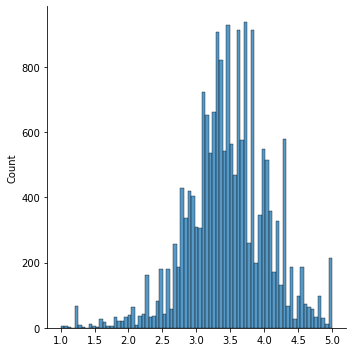

In [118]:
sns.displot(y_predict_test, )

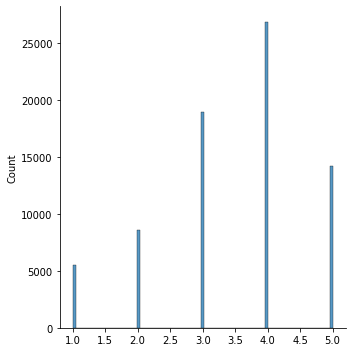

In [119]:
sns.displot(y_true_train, )

In [120]:
user_alphas = []
for i in user_index_list:
    movie_index_util_list, rating_list = get_movies_rated_by_user(ratings_train_arr, i)
    ridge = linear_model.RidgeCV(alphas=np.logspace(-6, 6, 13), fit_intercept=True, normalize=True)
    tfdif_by_user = tfidf[movie_index_util_list.tolist()]
    
    ridge.fit(tfdif_by_user, rating_list)
    user_alphas.append(ridge.alpha_)

    w[:, i] = ridge.coef_
    b[0, i] = ridge.intercept_

C:\Users\Pc\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), _RidgeGCV())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
C:\Users\Pc\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import

In [121]:
user_alphas

[1000000.0,
 100.0,
 1000000.0,
 1.0,
 1.0,
 10.0,
 10.0,
 1000000.0,
 1000000.0,
 100.0,
 1000000.0,
 10.0,
 1000000.0,
 1000000.0,
 100.0,
 1000000.0,
 1000000.0,
 10.0,
 1000000.0,
 1000000.0,
 1000000.0,
 10.0,
 10.0,
 100.0,
 10.0,
 1e-06,
 10.0,
 10.0,
 100.0,
 1000000.0,
 1000000.0,
 1000000.0,
 100.0,
 1.0,
 10.0,
 1.0,
 1000000.0,
 1000000.0,
 10.0,
 1000000.0,
 1000000.0,
 1000000.0,
 10.0,
 10.0,
 1000000.0,
 1000000.0,
 1000000.0,
 1000000.0,
 1000000.0,
 100.0,
 1000000.0,
 1.0,
 10.0,
 10.0,
 1000000.0,
 1000000.0,
 10.0,
 1000000.0,
 1000000.0,
 10.0,
 1000000.0,
 100.0,
 100.0,
 10.0,
 1000000.0,
 1000000.0,
 100.0,
 1000000.0,
 1000000.0,
 1.0,
 1000000.0,
 1000000.0,
 10.0,
 1000000.0,
 1000000.0,
 1000000.0,
 1000000.0,
 10.0,
 10.0,
 1000000.0,
 1000000.0,
 10.0,
 1000000.0,
 1000000.0,
 1000000.0,
 1000000.0,
 1000000.0,
 1000000.0,
 1000000.0,
 1000000.0,
 10.0,
 1.0,
 1000000.0,
 10.0,
 10.0,
 10.0,
 100.0,
 1000000.0,
 1000000.0,
 10.0,
 1000000.0,
 1000000.0,
 

In [122]:
Y = tfidf.dot(w)  + b;
Y

array([[4.03011591, 3.64385281, 4.29942095, ..., 3.24999937, 1.66666817,
        4.25000096],
       [4.03011582, 3.6514887 , 4.29942136, ..., 3.24999982, 1.66666851,
        4.25000029],
       [4.03011586, 3.6422255 , 4.29942098, ..., 3.24999575, 1.6666677 ,
        4.24999801],
       ...,
       [4.0301158 , 3.64277443, 4.29942101, ..., 3.25000137, 1.66666971,
        4.25000172],
       [4.03011577, 3.64018182, 4.29942102, ..., 3.25000003, 1.66666808,
        4.24999984],
       [4.03011586, 3.64371005, 4.29942098, ..., 3.24999912, 1.66666798,
        4.25000204]])

In [123]:
movie_indexes = ratings_train_arr[:, 5]
user_indexes = ratings_train_arr[:, 6]
true_scores = ratings_train_arr[:, 2]

y_true_train = []
y_predict_train = []
import math
for i in range(len(movie_indexes)):
    movie_index = movie_indexes[i]
    user_index = user_indexes[i]
    true_score = true_scores[i]
    if (Y[movie_index][user_index] != 0):
        y_true_train.append(true_score)
        y_predict_train.append(Y[movie_index][user_index])
y_predict_train = [5 if y > 5 else y for y in y_predict_train]
y_predict_train = [1 if y < 0 else y for y in y_predict_train]
y_predict_train = np.array(y_predict_train)
y_true_train = np.array(y_true_train)


In [124]:
#Compute MAE metrics
mae_train = Metrics.computeMAE(y_true_train, y_predict_train)
print(mae_test)
#Compute MSE metrics
mse_train = Metrics.computeMSE(y_true_train, y_predict_train)
print(mse_train)
#Compute SIA metrics
sia_train_1 = Metrics.computeSIA(y_true_train, y_predict_train, 1)
print(sia_train_1)

sia_train_0_5 = Metrics.computeSIA(y_true_train, y_predict_train, 0.5)
print(sia_train_0_5)

sia_train_0_25 = Metrics.computeSIA(y_true_train, y_predict_train, 0.25)
print(sia_train_0_25)


0.7682902600731737
0.8974612574211421
0.7309747409326425
0.44156142055267705
0.2475037780656304


In [125]:
movie_indexes = ratings_test_arr[:, 5]
user_indexes = ratings_test_arr[:, 6]
true_scores = ratings_test_arr[:, 2]

y_true_test = []
y_predict_test = []
import math
for i in range(len(movie_indexes)):
    movie_index = movie_indexes[i]
    user_index = user_indexes[i]
    true_score = true_scores[i]
    if (Y[movie_index][user_index] != 0):
        y_true_test.append(true_score)
        y_predict_test.append(Y[movie_index][user_index])
y_predict_test = [5 if y > 5 else y for y in y_predict_test]
y_predict_test = [1 if y < 0 else y for y in y_predict_test]
y_predict_test = np.array(y_predict_test)
y_true_test = np.array(y_true_test)


In [126]:
#Compute MAE metrics
mae_test = Metrics.computeMAE(y_true_test, y_predict_test)
print(mae_test)
#Compute MSE metrics
mse_test = Metrics.computeMSE(y_true_test, y_predict_test)
print(mse_test)
#Compute SIA metrics
sia_test_1 = Metrics.computeSIA(y_true_test, y_predict_test, 1)
print(sia_test_1)

sia_test_0_5 = Metrics.computeSIA(y_true_test, y_predict_test, 0.5)
print(sia_test_0_5)

sia_test_0_25 = Metrics.computeSIA(y_true_test, y_predict_test, 0.25)
print(sia_test_0_25)


0.7780600498551156
1.033226990333995
0.707357679914071
0.41772287862513424
0.22878625134264233
